In [72]:
import numpy as np
from scipy import stats
import pandas as pd
import datetime
import os
import ADP_tools as adp
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.colors

In [ ]:
def adcp_pd_to_xr(data):
    '''Take the dataframe created from 'adcp_data_merge' function and convert it into an analysis friendly xarray dataset.

    EXAMPLE: To convert a dataframe 'df' from adcp_data_merge into an xarray dataset 'ds'
    df = adcp_data_merge('ADCP', 2000)
    ds = adcp_pd_to_xr(df)

    VARIABLES:
    df - the dataframe created from adcp_data_merge'''

    # Create an array of unique values of 'date_time' and 'height' df
    # These arrays are used as the dimensions of the array when df is converted to an xarray dataset
    unique_datetime = np.unique(data['date_time'])
    date_time = pd.to_datetime(unique_datetime, utc= False)
    unique_depth = np.unique(data['depth'])

    # Use pd.pivot to manipulate df so that all velocity components (eastward, northward, upwards) are properly sorted
    # into their associated height in the water column
    pivoted_eastward = data.pivot(index='date_time',columns='depth',values='eastward')
    pivoted_northward = data.pivot(index='date_time',columns='depth',values='northward')
    pivoted_upwards = data.pivot(index='date_time',columns='depth',values='upwards')

    # Create an xarray dataset using the pivoted velocity components using the unique date_time and height values as the dimensions
    ds = xr.Dataset({'northward': (('time', 'depth'), pivoted_northward),
                         'eastward': (('time', 'depth'), pivoted_eastward)},
                       {'time': date_time.values, 'depth':unique_depth})
    return ds

In [64]:
test_df = pd.read_csv("processed_ADP_data/B8NS.csv")
test2_df = pd.read_csv("processed_ADP_data/B8dis.csv", delimiter=',', skiprows=[3], header=4, skipfooter = 15, parse_dates=[1,2])
test2_df

C:\Users\LoganAGrady\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Profile,Date,Time,Distance(m),DMG(m),DistEast(m),DistNorth(m),Latitude(deg),Longitude(deg),Depth_1(m),...,EsDepth(m),uVess(m/s),DirVess(deg),uFlow(m/s),DirFlow(deg),StdDev(m/s),DQI,#_Valid_Cells,Q(m^3/s),Q_Cumul(m^3/s)
0,1,2022-05-02,2022-05-10 12:27:43,2.0,2.0,2.0,0.0,36.810890,-121.784243,4.00,...,0,0.40,89.6,0.04,173.4,0.01,0.7,6,-0.34,-0.3
1,2,2022-05-02,2022-05-10 12:27:48,4.2,4.2,4.2,-0.1,36.810890,-121.784270,3.32,...,0,0.44,92.7,0.05,199.2,0.02,1.1,4,-0.36,-0.7
2,3,2022-05-02,2022-05-10 12:27:53,6.5,6.5,6.5,0.1,36.810888,-121.784300,2.55,...,0,0.46,85.5,0.12,246.6,0.04,2.4,3,-0.26,-1.0
3,4,2022-05-02,2022-05-10 12:27:58,8.8,8.8,8.7,0.7,36.810882,-121.784328,1.99,...,0,0.46,75.2,0.17,234.1,0.05,3.0,2,-0.34,-1.3
4,5,2022-05-02,2022-05-10 12:28:03,10.5,10.1,9.9,2.0,36.810878,-121.784348,2.11,...,0,0.35,42.4,0.12,302.7,0.04,2.0,2,0.54,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,2022-05-02,2022-05-10 12:38:08,0.0,87.7,72.3,49.7,36.809933,-121.783873,1.74,...,0,0.00,0.0,0.00,0.0,0.00,100.0,0,0.00,161.3
126,127,2022-05-02,2022-05-10 12:38:13,0.0,84.4,71.9,44.1,36.809947,-121.783882,1.74,...,0,0.00,0.0,0.00,0.0,0.00,100.0,0,0.00,161.3
127,128,2022-05-02,2022-05-10 12:38:18,280.2,83.9,71.5,43.8,36.809963,-121.783890,1.93,...,0,0.10,238.5,0.36,275.8,0.06,3.4,2,-0.20,161.1
128,129,2022-05-02,2022-05-10 12:38:23,293.0,72.4,58.8,42.3,36.809977,-121.783897,1.48,...,0,2.56,263.1,2.60,265.3,0.10,4.9,1,-1.73,159.4


In [66]:
unique_datetime = np.unique(test_df['date_time'])
date_time = pd.to_datetime(unique_datetime, utc= False)
unique_depth = np.unique(test_df['depth'])
unique_lat = np.unique(test_df['latitude'])
unique_lon = np.unique(test_df['longitude'])

pivoted_vx = test_df.pivot(index='date_time',columns='depth',values='V_x')
pivoted_vy = test_df.pivot(index='date_time',columns='depth',values='V_y')
#pivoted_vz = test_df.pivot(index='date_time',columns='depth',values='V_z')
test_ds = xr.Dataset({'V_x': (('time', 'depth'), pivoted_vx), 'V_y': (('time', 'depth'), pivoted_vy)},
                       {'time': date_time.values, 'depth':unique_depth})
test_ds

<xarray.Dataset>
Dimensions:  (time: 130, depth: 25)
Coordinates:
  * time     (time) datetime64[ns] 2022-05-02T12:27:43 ... 2022-05-02T12:38:28
  * depth    (depth) float64 0.8 1.2 1.6 2.0 2.4 2.8 ... 8.8 9.2 9.6 10.0 10.4
Data variables:
    V_x      (time, depth) float64 3.0 -0.1 -3.1 0.1 0.8 ... nan nan nan nan nan
    V_y      (time, depth) float64 -9.6 -11.5 -4.9 2.2 10.2 ... nan nan nan nan

C:\Users\LOGANA~1\AppData\Local\Temp/ipykernel_2028/3302257617.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(test_ds.V_x.time, test_ds.V_x.depth, test_ds.V_x.T,norm=norm)


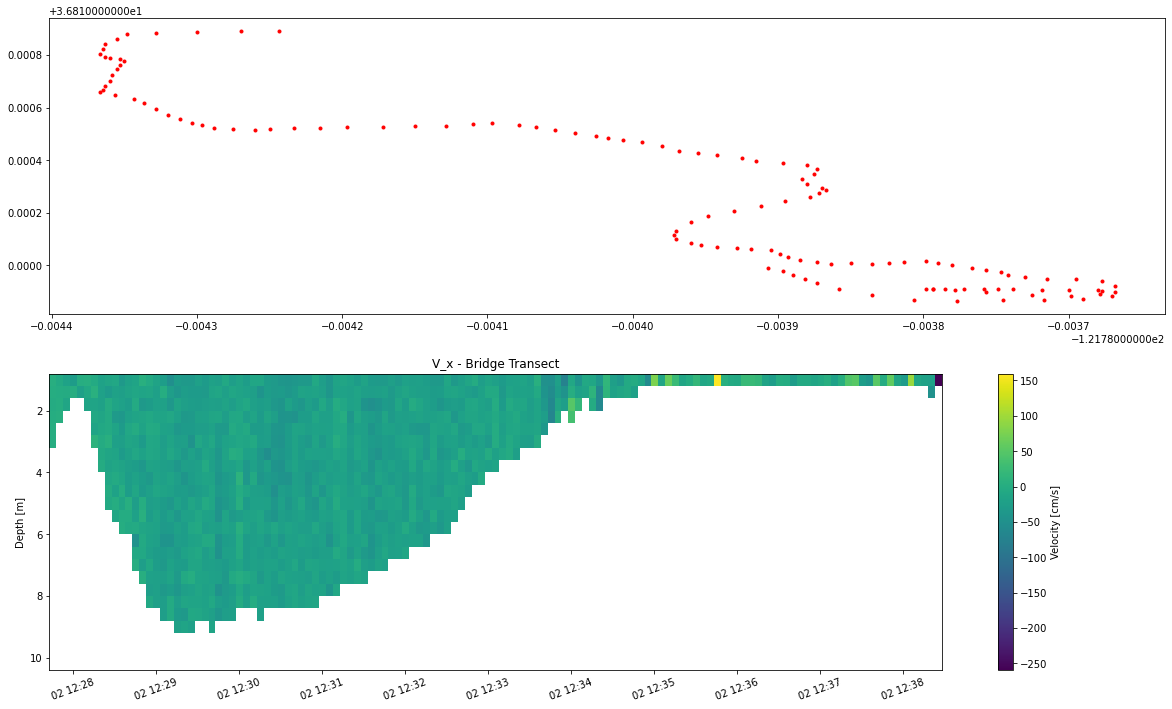

In [68]:
# Plot all EOF time series with their empirical counterparts
plt.figure(figsize = (20,12))
norm = matplotlib.colors.Normalize()

plt.subplot(211)
plt.plot(test2_df['Longitude(deg)'], test2_df['Latitude(deg)'], '.r')

# Alongshore color plot for empirical adcp data
plt.subplot(212)
plt.title('V_x - Bridge Transect')
plt.pcolormesh(test_ds.V_x.time, test_ds.V_x.depth, test_ds.V_x.T,norm=norm)
plt.colorbar(label='Velocity [cm/s]')
plt.ylabel('Depth [m]')
plt.xticks(rotation='20')
plt.gca().invert_yaxis()

#D1 all in inner channel (IC)
IC1NS_SN = t_reader('ELK2204251124.T')
IC1NS_SN.to_csv('IC1NS_SN.csv', index=False)
IC2NS = t_reader('ELK2204251135.T')
IC2NS.to_csv('IC2NS.csv', index=False)
IC3SN = t_reader('ELK2204251139.T')
IC3SN.to_csv('IC3SN.csv', index=False)
IC4NS = t_reader('ELK2204251145.T')
IC4NS.to_csv('IC4NS.csv', index=False)
IC5SN = t_reader('ELK2204251152.T')
IC5SN.to_csv('IC5SN.csv', index=False)

#Second day of transects IC and bridge (B)
IC6NS = t_reader('ELK2205021146.T')
IC6NS.to_csv('IC6NS.csv', index=False)
IC7SN = t_reader('ELK2205021153.T')
IC7SN.to_csv('IC7SN.csv', index=False)
B8NS = t_reader('ELK2205021227.T')
B8NS.to_csv('B8NS.csv', index=False)
B9SN = t_reader('ELK2205021239.T')
B9SN.to_csv('B9SN.csv', index=False)
#D2 in the afternoon
IC10NS = t_reader('ELK2205021438.T')
IC10NS.to_csv('IC10NS.csv', index=False)
IC11SN = t_reader('ELK2205021446.T')
IC11SN.to_csv('IC11SN.csv', index=False)
B12NS = t_reader('ELK2205021510.T')
B12NS.to_csv('B12NS.csv', index=False)
B13SN = t_reader('ELK2205021515.T')
B13SN.to_csv('B13SN.csv', index=False)

#Third day of transects
IC14NS = adp.t_reader('ELK2205091136.T')
IC14NS.to_csv('IC14NS.csv', index=False)
IC15SN = adp.t_reader('ELK2205091144.T')
IC15SN.to_csv('IC15SN.csv', index=False)
B16NS = adp.t_reader('ELK2205091201.T')
B16NS.to_csv('B16NS.csv', index=False)
#Afternoon
IC17NS = adp.t_reader('ELK2205091403.T')
IC17NS.to_csv('IC17NS.csv', index=False)
IC18SN = adp.t_reader('ELK2205091410.T')
IC18SN.to_csv('IC18SN.csv', index=False)
B19NS = adp.t_reader('ELK2205091424.T')
B19NS.to_csv('B19NS.csv', index=False)
B20SN = adp.t_reader('ELK2205091428.T')
B20SN.to_csv('B20SN.csv', index=False)